✅ model_base: <class 'sklearn.pipeline.Pipeline'>
✅ model_optuna: <class 'sklearn.pipeline.Pipeline'>
🔍 Steps model_base: [('preprocessing', ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM',
                                  'Avg_BPM', 'Resting_BPM',
                                  'Session_Duration (hours)', 'Calories_Burned',
                                  'Water_Intake (liters)',
                                  'Workout_Frequency (days/week)',
                                  'Experience_Level', 'BMI', 'Log_Age']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Workout_Type'])])), ('model', RandomForestRegressor(random_state=42))]
🔍 Steps model_optuna: [('preprocessing', ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM',
   

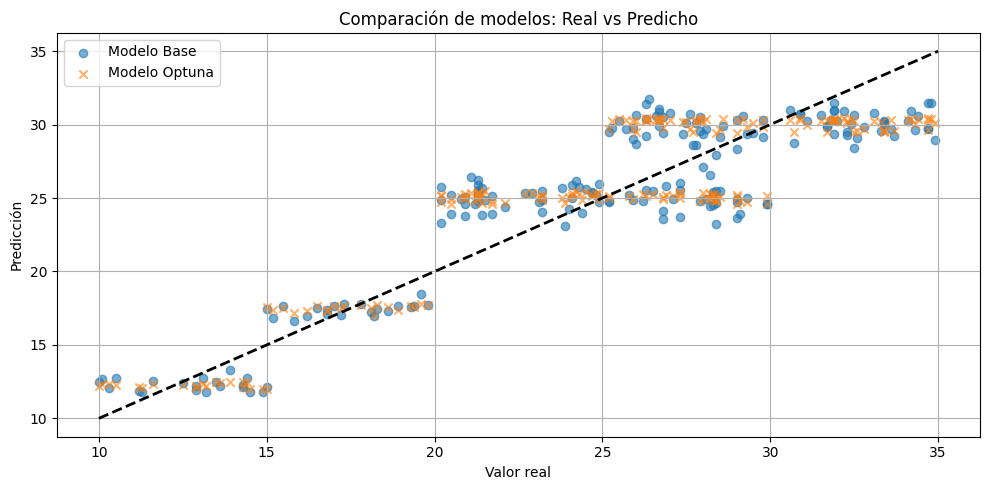

In [2]:
# 08_Comparar_modelos.ipynb

# ===============================
# 🔹 1. Importaciones
# ===============================
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ===============================
# 🔹 2. Cargar datos desde data/interim
# ===============================
ROOT = Path.cwd().parent
INTERIM_PATH = ROOT / "data" / "interim" / "feature_engineered_data.csv"

df = pd.read_csv(INTERIM_PATH)
target_col = "Fat_Percentage"
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 🔹 3. Cargar modelos
# ===============================
MODEL_DIR = ROOT / "models"
model_base = joblib.load(MODEL_DIR / "rf_pipeline.pkl")
model_optuna = joblib.load(MODEL_DIR / "rf_pipeline_optuna.pkl")

# ===============================
# 🔹 4. Validar que ambos son pipelines
# ===============================
print("✅ model_base:", type(model_base))
print("✅ model_optuna:", type(model_optuna))
print("🔍 Steps model_base:", getattr(model_base, "steps", "❌ No es un Pipeline"))
print("🔍 Steps model_optuna:", getattr(model_optuna, "steps", "❌ No es un Pipeline"))

# ===============================
# 🔹 5. Hacer predicciones
# ===============================
y_pred_base = model_base.predict(X_test)
y_pred_optuna = model_optuna.predict(X_test)

# ===============================
# 🔹 6. Mostrar métricas
# ===============================
def mostrar_metricas(y_true, y_pred, nombre_modelo):
    print(f"\n📊 {nombre_modelo}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

mostrar_metricas(y_test, y_pred_base, "Modelo Base")
mostrar_metricas(y_test, y_pred_optuna, "Modelo Optuna")

# ===============================
# 🔹 7. Comparación visual
# ===============================
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_base, alpha=0.6, label="Modelo Base")
plt.scatter(y_test, y_pred_optuna, alpha=0.6, label="Modelo Optuna", marker="x")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Comparación de modelos: Real vs Predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()